In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [26]:
data=pd.read_csv('redwinequality.csv')

In [27]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


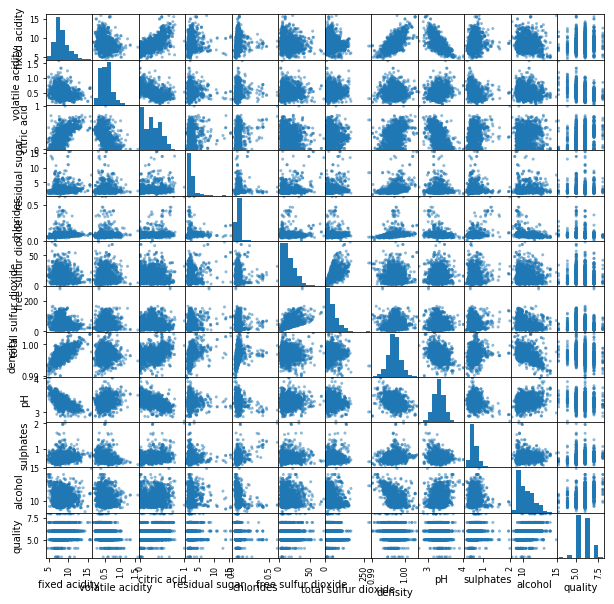

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,10))
plt.show()

In [30]:
quality_category = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        quality_category.append('1')
    elif i >= 4 and i <= 7:
        quality_category.append('2')
    elif i >= 8 and i <= 10:
        quality_category.append('3')
data['quality_category'] = quality_category 

In [33]:
data['quality_category'].unique()

array(['2', '3', '1'], dtype=object)

In [34]:
data.shape

(1599, 13)

In [35]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_category'],
      dtype='object')

In [36]:
x = data.iloc[:,:11]

In [37]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [40]:
y=data.iloc[:,-1]

In [41]:
y

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
1569    2
1570    2
1571    2
1572    2
1573    2
1574    2
1575    2
1576    2
1577    2
1578    2
1579    2
1580    2
1581    2
1582    2
1583    2
1584    2
1585    2
1586    2
1587    2
1588    2
1589    2
1590    2
1591    2
1592    2
1593    2
1594    2
1595    2
1596    2
1597    2
1598    2
Name: quality_category, Length: 1599, dtype: object

In [43]:
stdscaler=StandardScaler()

In [45]:
x=stdscaler.fit_transform(x)

In [48]:
pca=PCA(n_components=6)

In [49]:
x=pca.fit_transform(x)

In [52]:
x.shape

(1599, 6)

In [53]:
lg=LogisticRegression()

In [54]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.9824920897665017


In [57]:
print(cross_val_score(lg,x,y,cv=7).mean())

0.9825130245648597


In [59]:
y_pred=cross_val_predict(lg,x,y,cv=5)

In [60]:
y_pred

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

In [61]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=48)

In [66]:
lg=LogisticRegression()
lg.fit(train_x,train_y) 
pred=lg.predict(test_x) 
print("accuracy_score:", accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

accuracy_score: 0.9943181818181818
[[350   0]
 [  2   0]]
              precision    recall  f1-score   support

           2       0.99      1.00      1.00       350
           3       0.00      0.00      0.00         2

   micro avg       0.99      0.99      0.99       352
   macro avg       0.50      0.50      0.50       352
weighted avg       0.99      0.99      0.99       352



C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
svc=SVC(kernel='linear')
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.9943181818181818
[[350   0]
 [  2   0]]
              precision    recall  f1-score   support

           2       0.99      1.00      1.00       350
           3       0.00      0.00      0.00         2

   micro avg       0.99      0.99      0.99       352
   macro avg       0.50      0.50      0.50       352
weighted avg       0.99      0.99      0.99       352



C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
print(cross_val_score(svc,x,y,cv=7).mean())

0.9825130245648597


In [69]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.9914772727272727
[[  0   0   0]
 [  1 349   0]
 [  0   2   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.99      1.00      1.00       350
           3       0.00      0.00      0.00         2

   micro avg       0.99      0.99      0.99       352
   macro avg       0.33      0.33      0.33       352
weighted avg       0.99      0.99      0.99       352



C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to

In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.9744318181818182
[[  0   0   0]
 [  1 342   7]
 [  0   1   1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.98      0.99       350
           3       0.12      0.50      0.20         2

   micro avg       0.97      0.97      0.97       352
   macro avg       0.37      0.49      0.40       352
weighted avg       0.99      0.97      0.98       352



C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [81]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(train_x,train_y)
predknc=knc.predict(test_x)
print(accuracy_score(test_y,predknc))
print(confusion_matrix(test_y,predknc))
print(classification_report(test_y,predknc))

0.9943181818181818
[[350   0]
 [  2   0]]
              precision    recall  f1-score   support

           2       0.99      1.00      1.00       350
           3       0.00      0.00      0.00         2

   micro avg       0.99      0.99      0.99       352
   macro avg       0.50      0.50      0.50       352
weighted avg       0.99      0.99      0.99       352



C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
print(cross_val_score(knc,x,y,cv=7).mean())

0.9825130245648597


In [73]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(train_x,train_y)
predrf=rf.predict(test_x)
print(accuracy_score(test_y,predrf))
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

0.9943181818181818
[[350   0]
 [  2   0]]
              precision    recall  f1-score   support

           2       0.99      1.00      1.00       350
           3       0.00      0.00      0.00         2

   micro avg       0.99      0.99      0.99       352
   macro avg       0.50      0.50      0.50       352
weighted avg       0.99      0.99      0.99       352



C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
print(cross_val_score(rf,x,y,cv=7).mean())

0.9825130245648597


In [82]:
from sklearn.metrics import r2_score
print(r2_score(test_y,pred))

-0.005714285714286005


AttributeError: 'numpy.ndarray' object has no attribute 'predict_proba'

211     2
1349    2
185     2
697     2
295     2
1457    2
313     2
416     2
1229    2
572     2
1176    2
215     2
1153    2
869     2
1325    2
1052    2
1446    2
1477    2
383     2
1268    2
965     2
202     2
463     2
1211    2
345     2
1458    2
1214    2
1008    2
1271    2
783     2
       ..
698     2
1447    2
481     3
642     2
1249    2
475     2
322     2
1375    2
655     2
1113    2
612     2
790     2
1086    2
483     2
274     2
468     2
973     2
1117    2
1180    2
229     2
702     2
273     2
402     2
1142    2
772     2
74      2
222     2
652     2
1233    2
558     2
Name: quality_category, Length: 352, dtype: object